# Data Preparation

In [1]:
import os
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torch

# Define paths
data_dir = "D:\programing\Pneumonia\Images\Chest_xray\\2D"  # Replace with the full path if needed
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")
batch_size = 8

# Define transforms (customize as per your requirement)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a common size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Adjust based on grayscale images
])

# Custom dataset class
class PneumoniaDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.image_paths = []
        self.labels = []
        
        # Load images and labels
        for label in ["NORMAL", "PNEUMONIA"]:
            label_dir = os.path.join(directory, label)
            for img_name in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_name)
                self.image_paths.append(img_path)
                self.labels.append(0 if label == "NORMAL" else 1)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("L")  # Convert to grayscale
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Load datasets
train_dataset = PneumoniaDataset(train_dir, transform=transform)
val_dataset = PneumoniaDataset(val_dir, transform=transform)
test_dataset = PneumoniaDataset(test_dir, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [2]:
#count each class for train dataset
from collections import Counter

# Initialize a Counter to count the number of images per class
class_counts = Counter()

# Iterate over the dataset and count the number of images per class
for _, label in train_dataset:
    class_counts[label] += 1

# Print the class counts
print(class_counts)

Counter({1: 3875, 0: 1341})


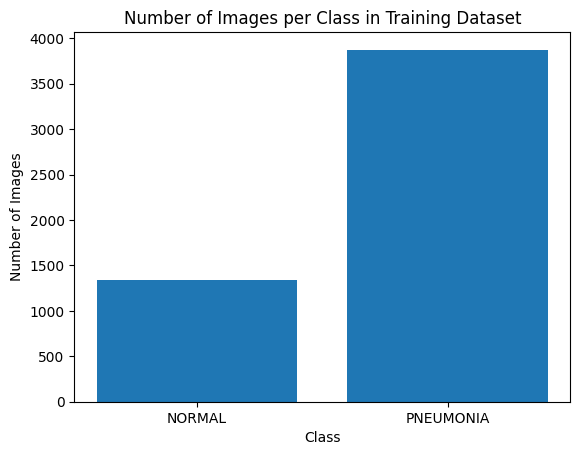

In [3]:
import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(['NORMAL', 'PNEUMONIA'], [class_counts[0], class_counts[1]])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Training Dataset')
plt.show()
